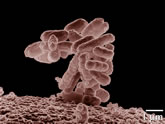

## E.Coli DNA classification 



In this project, we will explore the world of bioinformatics by using Markov models, K-nearest neighbor (KNN) algorithms, support vector machines, and other common classifiers to classify short E. Coli DNA sequences. This project will use a dataset from the UCI Machine Learning Repository that has 106 DNA sequences, with 57 sequential nucleotides (“base-pairs”) each.


Required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

Importing the Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
df = pd.read_csv(url, names = names)

In [3]:
df.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [4]:
df.shape

(106, 3)

In [5]:
df.describe()

,Class,id,Sequence
count,106,106,106
unique,2,106,106
top,-,751,\t\tttagagagcatgtcagcctcgacaacttgcataaatgctttc...
freq,53,1,1


## Preprocessing the Dataset

The data is not in a usable form; as a result, we will need to process it before using it to train our algorithms.

In [6]:
# Build our dataset using custom pandas dataframe
clases = df.loc[:,'Class']
# generate list of DNA sequence
sequence = list(df.loc[:, 'Sequence'])
sequence

['\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt',
 '\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa',
 '\t\tgtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg',
 '\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc',
 '\ttcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag',
 '\taggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt',
 '\t\tcagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat',
 '\t\ttttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca',
 '\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt',
 '\tttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\tgcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg',
 '\tcctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac',
 '\tgatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga',
 '\tctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca',
 '\ttttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\taagcaaagaaatgcttgactctgt

In [7]:
#Remove tab from each sequence
dic = {}
for k, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(clases[k])
    
    dic[k] = nucleotides
 



In [8]:
dic[1]

['t',
 'g',
 'c',
 't',
 'a',
 't',
 'c',
 'c',
 't',
 'g',
 'a',
 'c',
 'a',
 'g',
 't',
 't',
 'g',
 't',
 'c',
 'a',
 'c',
 'g',
 'c',
 't',
 'g',
 'a',
 't',
 't',
 'g',
 'g',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 't',
 'a',
 'c',
 'a',
 'a',
 't',
 'c',
 't',
 'a',
 'a',
 'c',
 'g',
 'c',
 'a',
 't',
 'c',
 'g',
 'c',
 'c',
 'a',
 'a',
 '+']

In [9]:
# Convert Dict  into a  dataframe
data = pd.DataFrame(dic)
data.shape


(58, 106)

In [10]:
# transpose dataframe into correct format
data = data.transpose()
data.shape

(106, 58)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [11]:
# Rename
data.rename(columns = {57:'Class'}, inplace = True)

In [12]:
data['Class']

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object

In [13]:
data.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56, 'Class'],
      dtype='object')

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [15]:
#Encoding
numerical_df = pd.get_dummies(data)
numerical_df.head()


,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,...,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0


In [16]:
# Drop class_- or Class_+ either of one
numerical_df.drop('Class_-', axis = 1, inplace = True)

In [17]:
# rename Class_+ to Class
numerical_df.rename(columns = {'Class_+':'Class'}, inplace = True)

## Training and Testing the Classification Algorithm


Splitting data

In [27]:
X = numerical_df.drop(['Class'], axis = 1).values
y = numerical_df['Class'].values

#define a seed for reproducibility
seed = 1

# Splitting data into the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [28]:
# Define scoring method
scoring = 'accuracy'
# Model building to train
names = ['SVM Linear', 'SVM RBF', 'SVM Sigmoid']
Classifiers = [
    svm.SVC(kernel = 'linear'),
    svm.SVC(kernel = 'rbf'),
    svm.SVC(kernel = 'sigmoid')
    
    ]
models = zip(names, Classifiers)

names = []
result = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

SVM Linear: 0.9125 (0.09762812094883318)
SVM RBF: 0.875 (0.11180339887498948)
SVM Sigmoid: 0.925 (0.1)


## The Model's Evaluation

In [29]:


#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    



SVM Linear
0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

SVM RBF
0.9259259259259259
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27

SVM Sigmoid
0.9259259259259259
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0

Support Vector Machine with 'linear' kernel performed best with F1_score = 0.96 on testing data.


## Run SVM with linear kernel

Run SVM with linear kernel and C=1.0

In [31]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
accuracy_score(y_test, y_pred_test)

0.9629629629629629

Run SVM with linear kernel and C=100.0

In [32]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
accuracy_score(y_test, y_pred_test)

0.9629629629629629

Compare the train-set and test-set accuracy

In [33]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=uint8)

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000




We can see that the training set and test-set accuracy are comparable.



## Check for overfitting and underfitting


In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9630




The training-set accuracy score is 1.00 while the test-set accuracy to be 0.9630. These two values are quite comparable. So, there is no question of overfitting.


## Run SVM with polynomial kernel

In [41]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly') 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.8889




Polynomial kernel gives poor performance.

## ROC - AUC
ROC Curve

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

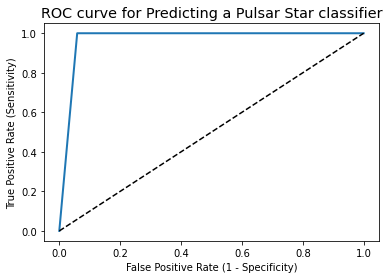

In [42]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

##  Hyperparameter Optimization using GridSearch CV

In [43]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [44]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9117


Parameters that give the best results : 

 {'C': 1, 'degree': 2, 'gamma': 0.02, 'kernel': 'poly'}


Estimator that was chosen by the search : 

 SVC(C=1, degree=2, gamma=0.02, kernel='poly')
